## Initialization
We'll start off by importing the necessary libraries and modules. Unique to this notebook will be a separate notebook containing any
functions required for this project.

In [2]:
# Importing the standard libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [1]:
# Importing the file containing our unique functions
"""
vals_by_col
date_to_col
secondary_unique
counts_to_portions
expand_categories
"""
# pip install ipynb
from ipynb.fs.full.blog_post_functions import *

## Load Data and Perform Initial Inspection
We gathered our data from https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy, which provided a dataset named "Call Data" containing data on emergency calls to the Seattle Police Department call center.

The dataset itself is just over 5 million rows, and very much so over GitHub's size limitation. The dataset we will be performing our analysis on is a subset containing 10,000 rows of data.

In [ ]:
"""
DO NOT RUN!

This cell will not run, it is only included to show how we obtained our subset.
"""

df = pd.read_csv('Call_Data.csv')

np.random.seed(0)
df_sample = np.random.choice(df.shape[0], 10000, replace = False)
df_subset = df.loc[df_sample]

df_subset.to_csv('Call_Data_Subset.csv')

In [3]:
# Loading the Data (pretending we're starting with the 10,000 row dataset)
df = pd.read_csv('Call_Data_Subset.csv')

## Initial Inspection
1. Check data types, and how it is all formatted.
2. Check for missing values, and amount of missing values.
3. Look for anything unique. Is there anything we haven't encountered before?

In [7]:
# Overall shape
df.shape

(10000, 12)

In [9]:
# Columns
df.columns

Index(['Unnamed: 0', 'CAD Event Number', 'Event Clearance Description',
       'Call Type', 'Priority', 'Initial Call Type', 'Final Call Type',
       'Original Time Queued', 'Arrived Time', 'Precinct', 'Sector', 'Beat'],
      dtype='object')


In [10]:
# What do the first few rows look like?
df.head(10)

Unnamed: 0  CAD Event Number               Event Clearance Description  \
0     2255988     2017000106644                   PROBLEM SOLVING PROJECT   
1      602424     2022000027644                       ASSISTANCE RENDERED   
2     4322263     2020000160933                       ASSISTANCE RENDERED   
3     1660533     2021000000962                       ASSISTANCE RENDERED   
4      717846     2018000405368          DUPLICATED OR CANCELLED BY RADIO   
5      593820     2021000157964    NO POLICE ACTION POSSIBLE OR NECESSARY   
6     2468962     2019000255821  UNABLE TO LOCATE INCIDENT OR COMPLAINANT   
7     2651296     2020000063174                       ASSISTANCE RENDERED   
8      346189     2019000117647                REPORT WRITTEN (NO ARREST)   
9      784470     2017000073616                       ASSISTANCE RENDERED   

                  Call Type  Priority  \
0                    ONVIEW         4   
1                    ONVIEW         9   
2                       911         3   
3                    ONVIEW         7   
4                       911         1   
5                       911         2   
6                       911         3   
7                    ONVIEW         9   
8  TELEPHONE OTHER, NOT 911         3   
9                    ONVIEW         7   

                                   Initial Call Type  \
0                                   REQUEST TO WATCH   
1              -ASSIGNED DUTY - DETAIL BY SUPERVISOR   
2         CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED   
3       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   
4  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)   
5                                           TRESPASS   
6                                NUISANCE - MISCHIEF   
7                                OFF DUTY EMPLOYMENT   
8             SUSPICIOUS PERSON, VEHICLE OR INCIDENT   
9       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   

                                     Final Call Type    Original Time Queued  \
0                --PREMISE CHECKS - REQUEST TO WATCH  03/27/2017 05:02:47 AM   
1                   --MISCHIEF OR NUISANCE - GENERAL  02/02/2022 09:42:35 AM   
2                              --DISTURBANCE - OTHER  05/15/2020 11:23:01 PM   
3                --PREMISE CHECKS - CRIME PREVENTION  01/02/2021 10:16:02 AM   
4  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)  10/29/2018 05:54:26 PM   
5                               --PROWLER - TRESPASS  06/24/2021 11:02:12 PM   
6                   --MISCHIEF OR NUISANCE - GENERAL  07/12/2019 08:51:59 PM   
7                               -OFF DUTY EMPLOYMENT  02/19/2020 04:19:09 PM   
8           --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON  04/03/2019 08:19:42 AM   
9                --PREMISE CHECKS - REQUEST TO WATCH  03/01/2017 04:38:28 AM   

             Arrived Time   Precinct   Sector Beat  
0  03/27/2017 05:02:47 AM      SOUTH    OCEAN   O3  
1  02/02/2022 09:42:35 AM       WEST     KING   K1  
2  05/15/2020 11:33:28 PM      SOUTH   ROBERT   R1  
3  01/02/2021 10:16:02 AM       WEST    DAVID   D3  
4  01/01/1900 12:00:00 AM      NORTH  LINCOLN   L2  
5  01/01/1900 12:00:00 AM      NORTH  LINCOLN   L3  
6  07/12/2019 09:12:50 PM  SOUTHWEST    FRANK   F1  
7  02/19/2020 04:19:09 PM       WEST     MARY   M1  
8  04/03/2019 08:50:03 AM      NORTH      BOY   B2  
9  03/01/2017 04:38:28 AM      NORTH  LINCOLN   L1

In [11]:
# Data Types
df.dtypes

Unnamed: 0                      int64
CAD Event Number                int64
Event Clearance Description    object
Call Type                      object
Priority                        int64
Initial Call Type              object
Final Call Type                object
Original Time Queued           object
Arrived Time                   object
Precinct                       object
Sector                         object
Beat                           object
dtype: object

In [12]:
# Missing Data
df.isnull().sum()

Unnamed: 0                      0
CAD Event Number                0
Event Clearance Description     0
Call Type                       0
Priority                        0
Initial Call Type               0
Final Call Type                 0
Original Time Queued            0
Arrived Time                    0
Precinct                        0
Sector                         95
Beat                            0
dtype: int64

In [6]:
# Unique Values
# See blog_post_functions for more information on vals_by_col
col_uniques = vals_by_col(df, df.columns[2:])
print(col_uniques)

Event Clearance Description    [ASSISTANCE RENDERED, REPORT WRITTEN (NO ARRES...
Call Type                      [ONVIEW, 911, TELEPHONE OTHER, NOT 911, ALARM ...
Priority                                            [3, 2, 7, 1, 9, 4, 5, 6, -1]
Initial Call Type              [PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY,...
Final Call Type                [--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON, --P...
Original Time Queued           [03/27/2017 05:02:47 AM, 05/18/2016 06:04:43 P...
Arrived Time                   [01/01/1900 12:00:00 AM, 03/27/2017 05:02:47 A...
Precinct                          [WEST, NORTH, SOUTH, EAST, SOUTHWEST, UNKNOWN]
Sector                         [KING, MARY, EDWARD, DAVID, UNION, SAM, NORA, ...
Beat                           [K3, M3, E2, D2, N3, M1, K2, M2, D1, K1, Q3, U...
dtype: object


In [8]:
# How many uniques are there?
[len(uniques) for uniques in col_uniques]

[25, 7, 9, 219, 245, 10000, 9291, 6, 17, 72]

In [10]:
# Potentially hidden Missing Data: "-"
"""
Hard to tell from the view above, but further examination revealed that there was another type of missing data point,
which presented itself as a dash, "-"
"""
marked_null = []
for col_num, col in enumerate(col_uniques):
    if '-' in col:
        marked_null.append(col_uniques.index[col_num])
print(marked_null)

['Event Clearance Description']


In [12]:
df['Event Clearance Description'].value_counts()

ASSISTANCE RENDERED                                                    4348
REPORT WRITTEN (NO ARREST)                                             2016
UNABLE TO LOCATE INCIDENT OR COMPLAINANT                                693
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)                              490
ORAL WARNING GIVEN                                                      454
PHYSICAL ARREST MADE                                                    314
NO POLICE ACTION POSSIBLE OR NECESSARY                                  270
PROBLEM SOLVING PROJECT                                                 264
FALSE COMPLAINT/UNFOUNDED                                               264
OTHER REPORT MADE                                                       259
FOLLOW-UP REPORT MADE                                                   161
RESPONDING UNIT(S) CANCELLED BY RADIO                                   141
DUPLICATED OR CANCELLED BY RADIO                                         74
-           

In [13]:
df['Event Clearance Description'].value_counts().loc['-']

63

In [17]:
# Remove nulls and blanks in data
df.dropna(axis = 0, inplace = True)
df.drop(df[df['Event Clearance Description'] == '-'].index, inplace = True)

In [19]:
# Additionally, the first two columns are essentially covered by index, we'll remove those
df = df.drop(['Unnamed: 0', 'CAD Event Number'], axis=1)
df.shape

(9843, 10)

In [22]:
1 - (df.shape[0] / 10000)

0.015700000000000047

## Initialization Thought Process and Notes
1. The data is relatively complete. The nulls and blank values only represented about 1.6% of the rows.
2. The time columns, queue time and arrive time, consisted almost entirely of unique values. It would be beneficial to address this by breaking apart the date and time values into individual components. Not only would this be useful for a successful model build, but also for gaining a better understanding of the data.
3. The data consisted mostly of object type data. After removing the first two columns, there was only one non-object type data column remaining, "Priority". With how many uniques some of the non-time columns had, this could result in some heavy categorical encoding.

## Potential Questions
1. What time of the year / week / day do the majority of the calls come in?
2. Do amount of calls / priority of calls change by precint, sector or beat?
3. What determines priority?

After performing some research on Computer-Aided-Dispatch systems (CAD), it appears the system itself assigns a Priority rating. Unfortunately, we're missing some of the datapoints actually used in assigning the Priority rating. However, let's see how closely we can build a model that will predict Priority ratings.

4. Can we buld a model to accurately predict Priority ratings?

## Potential Question 1
What time of the year / week / day do the majority of the calls come in?

In [23]:
# Building off the additional thoughts section, now would be a good time to deal with the time dilemma

# Substitute in more manageable column names
df = df.rename({'Original Time Queued': 'queue_time',
                              'Arrived Time': 'arrive_time'}, axis = 'columns')

# Split the time columns into separate columns for each component (month, day, year, hour, minute, second)
# 
df = date_to_col(df, 'queue_time')
df = date_to_col(df, 'arrive_time')

In [24]:
# Let's see what that accomplished
df.head(10)

Event Clearance Description                 Call Type  \
0                   PROBLEM SOLVING PROJECT                    ONVIEW   
1                       ASSISTANCE RENDERED                    ONVIEW   
2                       ASSISTANCE RENDERED                       911   
3                       ASSISTANCE RENDERED                    ONVIEW   
4          DUPLICATED OR CANCELLED BY RADIO                       911   
5    NO POLICE ACTION POSSIBLE OR NECESSARY                       911   
6  UNABLE TO LOCATE INCIDENT OR COMPLAINANT                       911   
7                       ASSISTANCE RENDERED                    ONVIEW   
8                REPORT WRITTEN (NO ARREST)  TELEPHONE OTHER, NOT 911   
9                       ASSISTANCE RENDERED                    ONVIEW   

   Priority                                  Initial Call Type  \
0         4                                   REQUEST TO WATCH   
1         9              -ASSIGNED DUTY - DETAIL BY SUPERVISOR   
2         3         CHILD - ABAND, ABUSED, MOLESTED, NEGLECTED   
3         7       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   
4         1  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)   
5         2                                           TRESPASS   
6         3                                NUISANCE - MISCHIEF   
7         9                                OFF DUTY EMPLOYMENT   
8         3             SUSPICIOUS PERSON, VEHICLE OR INCIDENT   
9         7       PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   

                                     Final Call Type   Precinct   Sector Beat  \
0                --PREMISE CHECKS - REQUEST TO WATCH      SOUTH    OCEAN   O3   
1                   --MISCHIEF OR NUISANCE - GENERAL       WEST     KING   K1   
2                              --DISTURBANCE - OTHER      SOUTH   ROBERT   R1   
3                --PREMISE CHECKS - CRIME PREVENTION       WEST    DAVID   D3   
4  UNKNOWN - ANI/ALI - LANDLINE (INCLUDES OPEN LINE)      NORTH  LINCOLN   L2   
5                               --PROWLER - TRESPASS      NORTH  LINCOLN   L3   
6                   --MISCHIEF OR NUISANCE - GENERAL  SOUTHWEST    FRANK   F1   
7                               -OFF DUTY EMPLOYMENT       WEST     MARY   M1   
8           --SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON      NORTH      BOY   B2   
9                --PREMISE CHECKS - REQUEST TO WATCH      NORTH  LINCOLN   L1   

   queue_time_month  queue_time_day  queue_time_year  queue_time_hour  \
0                 3              27             2017                5   
1                 2               2             2022                9   
2                 5              15             2020               23   
3                 1               2             2021               10   
4                10              29             2018               17   
5                 6              24             2021               23   
6                 7              12             2019               20   
7                 2              19             2020               16   
8                 4               3             2019                8   
9                 3               1             2017                4   

   queue_time_minute  queue_time_second  arrive_time_month  arrive_time_day  \
0                  2                 47                  3               27   
1                 42                 35                  2                2   
2                 23                  1                  5               15   
3                 16                  2                  1                2   
4                 54                 26                  1                1   
5                  2                 12                  1                1   
6                 51                 59                  7               12   
7                 19                  9                  2               19   
8                 19                 42                  4                3   

<AxesSubplot:xlabel='queue_time_hour', ylabel='count'>

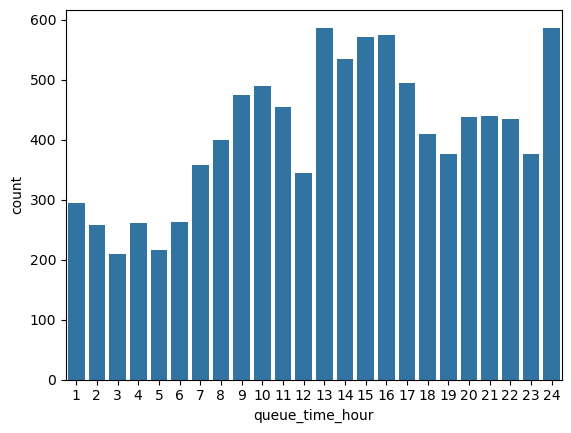

In [29]:
# time of the day for calls
base_color = sb.color_palette()[0]
time_of_day = df['queue_time_hour'].value_counts()
sb.countplot(data = df, x = 'queue_time_hour', color = base_color)

<AxesSubplot:xlabel='queue_time_hour', ylabel='count'>

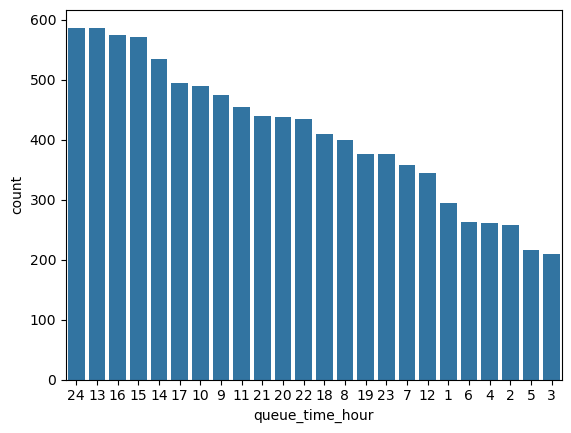

In [30]:
sb.countplot(data = df, x = 'queue_time_hour', color = base_color,
             order = time_of_day.index)

In [ ]:
"""
The majority of the calls were queued, almost evenly, at midnight and at 1pm.
In other words, somewhat into the nightlife scene and then right after lunch.
We should explore what the top call categories were for these times.
"""

<AxesSubplot:xlabel='queue_time_day', ylabel='count'>

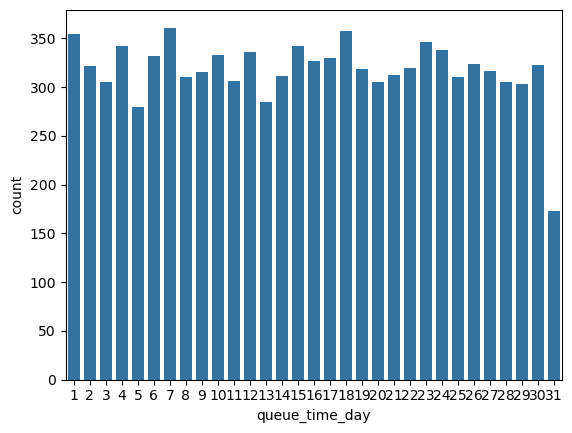

In [32]:
# day of the months for calls (note that probably remove due to inconsistency of days per month)
time_of_month = df['queue_time_day'].value_counts()
sb.countplot(data = df, x = 'queue_time_day', color = base_color)

<AxesSubplot:xlabel='queue_time_day', ylabel='count'>

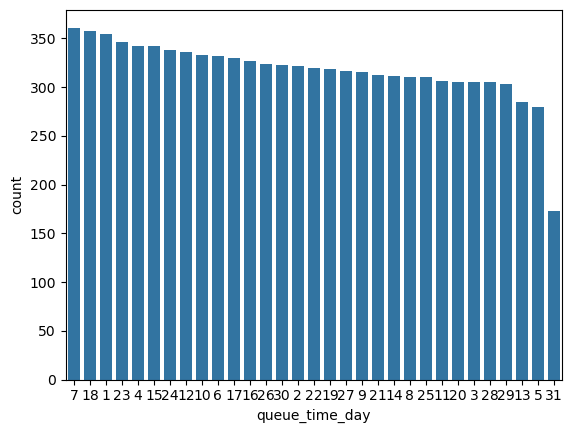

In [33]:
sb.countplot(data = df, x = 'queue_time_day', color = base_color,
             order = time_of_month.index)

In [ ]:
"""
There is some volatility, but it is difficult to draw any conclusions.
It's also logical that the 31st day has the lowest count, given that not every month has 31 days.
Something to potentially come back to would be to use the month/day/year to find days of the week.
I wonder how a Friday would compare to a Wednesday?
"""

<AxesSubplot:xlabel='queue_time_month', ylabel='count'>

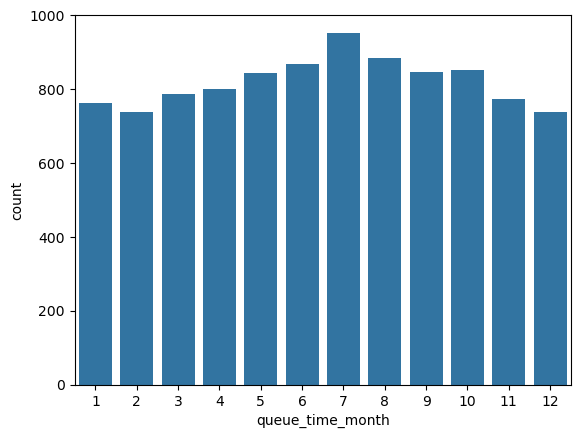

In [34]:
# month of the year
time_of_year = df['queue_time_month'].value_counts()
sb.countplot(data = df, x = 'queue_time_month', color = base_color)

<AxesSubplot:xlabel='queue_time_month', ylabel='count'>

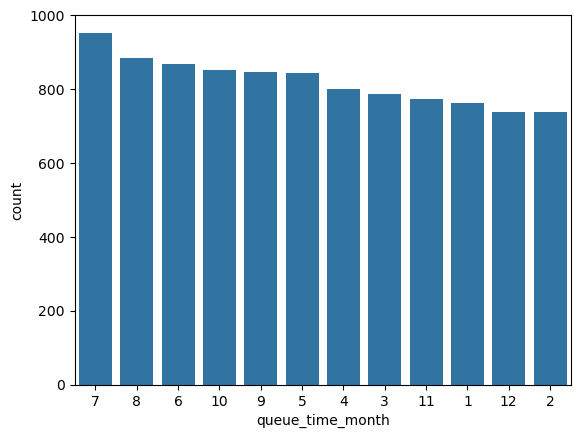

In [36]:
sb.countplot(data = df, x = 'queue_time_month', color = base_color,
             order = time_of_year.index)

In [ ]:
"""
July especially, but then followed by the other summer months of August and June.
Nicer weather, children aren't in school, possibly more tourists?
There are several potential avenues to explore.
"""

<AxesSubplot:xlabel='queue_time_year', ylabel='count'>

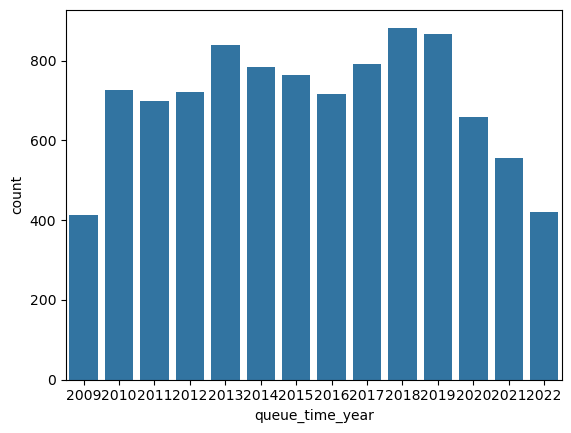

In [37]:
# call rate over the years
call_year = df['queue_time_year'].value_counts()
sb.countplot(data = df, x = 'queue_time_year', color = base_color)

<AxesSubplot:xlabel='queue_time_year', ylabel='count'>

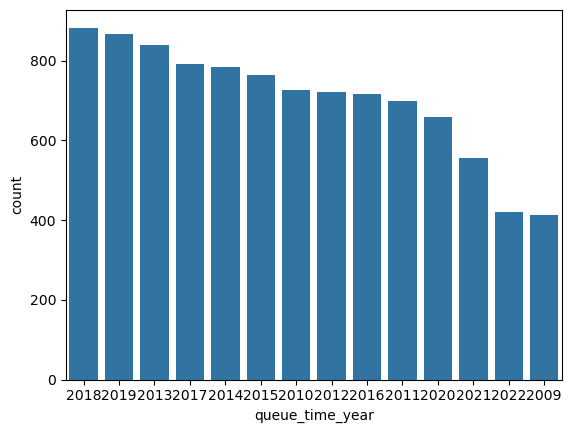

In [38]:
sb.countplot(data = df, x = 'queue_time_year', color = base_color,
             order = call_year.index)

In [ ]:
"""
Unless we were performing a historical analysis, and trying to predict what points would have been previously,
it wouldn't be logical to retain year for building the predictive model as it will either be constant or not in
the data.

We could use the dates to explore or remove possible outlier dates such as sporting events, protests, etc.

TLDR; not very useful for multiple reasons.
"""

## Question 1 Thought Process and Notes
1. Time of the day has potential to be a driver. We should explore what the top call categories were for midnight and 1pm.
2. Month of the year has potential to be a driver. However, this would be far more interesting if paired with another database, such as tourists and weather.
3. Day of the month didn't provide too much insight. However, maybe paired with month of the year, we could see a pattern given certain special days such as July 4th, New Years Eve, etc.
4. Year was somewhat arbitrary, as a predictive model is at some point going to contain a year not even in the training data. One thing to note would be explore outliers such as historical events.

Before moving on to the next question, we'll explore the top call categories for midnight and 1pm.

In [61]:
# See blog_post_functions for more information on vals_by_col
# Make a DataFrame which counts the number of times each unique call type appears for each hour
time_and_call = secondary_unique(df, 'queue_time_hour', 'Initial Call Type', 'yes')

In [42]:
time_and_call.head(10)

24  13  16  15  14  17  10  \
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      51  65  50  35  42  32  46   
DISTURBANCE, MISCELLANEOUS/OTHER                  35  20  21  21  20  29  15   
TRAFFIC STOP - OFFICER INITIATED ONVIEW           30  29  20  17  23  22  22   
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            29  31  21  28  31  24  28   
PARKING VIOLATION (EXCEPT ABANDONED CAR)          29  27  18  29  24  23  40   
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        27  19  15  21  19  19  16   
DIRECTED PATROL ACTIVITY                          21  21  17  19  28  12   9   
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)  13   7  13  11   9   4   4   
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)         12  12  13  16  19  12  14   
NUISANCE - MISCHIEF                               11  10   9   5   6   7  16   

                                                  9   11  21  ...  19  23  7   \
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      52  36  31  ...  21  21  45   
DISTURBANCE, MISCELLANEOUS/OTHER                  21  22  25  ...  21  20  11   
TRAFFIC STOP - OFFICER INITIATED ONVIEW           20  24  48  ...   9  32  17   
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            27  23  38  ...  29  33  19   
PARKING VIOLATION (EXCEPT ABANDONED CAR)          31  33  15  ...  20  13  31   
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         4  16  19  ...   3  28   4   
DIRECTED PATROL ACTIVITY                          13   6  12  ...   9   9  17   
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   2   5  11  ...   7   7   1   
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)         13   9   5  ...  10   5   9   
NUISANCE - MISCHIEF                               15  13   6  ...   8   3  14   

                                                  12  1   6   4   2   5   3   
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      26  25  31  45  18  26  25  
DISTURBANCE, MISCELLANEOUS/OTHER                  18  27   7   8  28  14  18  
TRAFFIC STOP - OFFICER INITIATED ONVIEW           31  26  13  11  22  11  11  
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            34  27  14  20  26  11  10  
PARKING VIOLATION (EXCEPT ABANDONED CAR)           6   4  15   2   3   7   1  
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        27  17   7   9  12   4   9  
DIRECTED PATROL ACTIVITY                          12  11  19  35   3  19  13  
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)   2   4   0   2   2   0   1  
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)          1  10   5   6   4  12   5  
NUISANCE - MISCHIEF                                2   1   7   1   0   2   1  

[10 rows x 24 columns]

In [62]:
# turn the counts into percentages by category per specific hour (percentages by column)
time_and_call_percent = counts_to_portions(time_and_call, variant = 'col')

In [63]:
time_and_call_percent[[24, 13]].head(10)

24        13
PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY      0.086882  0.110733
DISTURBANCE, MISCELLANEOUS/OTHER                  0.059625  0.034072
TRAFFIC STOP - OFFICER INITIATED ONVIEW           0.051107  0.049404
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.049404  0.052811
PARKING VIOLATION (EXCEPT ABANDONED CAR)          0.049404  0.045997
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.045997  0.032368
DIRECTED PATROL ACTIVITY                          0.035775  0.035775
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)  0.022147  0.011925
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)         0.020443  0.020443
NUISANCE - MISCHIEF                               0.018739  0.017036

In [64]:
time_and_call_percent[24].sort_values(ascending=False).head(10)

PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY        0.086882
DISTURBANCE, MISCELLANEOUS/OTHER                    0.059625
TRAFFIC STOP - OFFICER INITIATED ONVIEW             0.051107
SUSPICIOUS PERSON, VEHICLE OR INCIDENT              0.049404
PARKING VIOLATION (EXCEPT ABANDONED CAR)            0.049404
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW          0.045997
DIRECTED PATROL ACTIVITY                            0.035775
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)    0.022147
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)           0.020443
NUISANCE - MISCHIEF                                 0.018739
Name: 24, dtype: float64

In [65]:
time_and_call_percent[13].sort_values(ascending=False).head(10)

PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY    0.110733
SUSPICIOUS PERSON, VEHICLE OR INCIDENT          0.052811
TRAFFIC STOP - OFFICER INITIATED ONVIEW         0.049404
PARKING VIOLATION (EXCEPT ABANDONED CAR)        0.045997
DIRECTED PATROL ACTIVITY                        0.035775
DISTURBANCE, MISCELLANEOUS/OTHER                0.034072
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      0.032368
SHOPLIFT - THEFT                                0.030664
TRESPASS                                        0.030664
FOLLOW UP                                       0.023850
Name: 13, dtype: float64

In [69]:
# For reference, we should take a look at the top 10 overall for Initial Call Type
df['Initial Call Type'].value_counts(ascending=False).head(10) / df.shape[0]

PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY    0.086356
SUSPICIOUS PERSON, VEHICLE OR INCIDENT          0.059535
TRAFFIC STOP - OFFICER INITIATED ONVIEW         0.055369
DISTURBANCE, MISCELLANEOUS/OTHER                0.049782
PARKING VIOLATION (EXCEPT ABANDONED CAR)        0.046937
DIRECTED PATROL ACTIVITY                        0.036371
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW      0.035152
TRESPASS                                        0.024891
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)       0.022859
OFF DUTY EMPLOYMENT                             0.017474
Name: Initial Call Type, dtype: float64

In [54]:
time_and_call = secondary_unique(df, 'queue_time_hour', 'Final Call Type', 'yes')
time_and_call_percent = counts_to_portions(time_and_call, variant = 'col')
time_and_call_percent[[24, 13]].head(10)

24        13
--PREMISE CHECKS - CRIME PREVENTION              0.080068  0.091993
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON         0.080068  0.071550
--TRAFFIC - MV COLLISION INVESTIGATION           0.064736  0.052811
--DISTURBANCE - OTHER                            0.056218  0.049404
--TRAFFIC - MOVING VIOLATION                     0.056218  0.045997
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)  0.056218  0.051107
--THEFT - ALL OTHER                              0.035775  0.018739
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)          0.035775  0.037479
--DIRECTED PATROL ACTIVITY                       0.025554  0.034072
--CRISIS COMPLAINT - GENERAL                     0.023850  0.020443

In [59]:
time_and_call_percent[24].sort_values(ascending=False).head(10)

--PREMISE CHECKS - CRIME PREVENTION                0.080068
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           0.080068
--TRAFFIC - MV COLLISION INVESTIGATION             0.064736
--DISTURBANCE - OTHER                              0.056218
--TRAFFIC - MOVING VIOLATION                       0.056218
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    0.056218
--THEFT - ALL OTHER                                0.035775
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)            0.035775
--DIRECTED PATROL ACTIVITY                         0.025554
--PROWLER - TRESPASS                               0.023850
Name: 24, dtype: float64

In [60]:
time_and_call_percent[13].sort_values(ascending=False).head(10)

--PREMISE CHECKS - CRIME PREVENTION                0.091993
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           0.071550
--TRAFFIC - MV COLLISION INVESTIGATION             0.052811
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    0.051107
--DISTURBANCE - OTHER                              0.049404
--TRAFFIC - MOVING VIOLATION                       0.045997
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)            0.037479
--DIRECTED PATROL ACTIVITY                         0.034072
--PROWLER - TRESPASS                               0.025554
--THEFT - SHOPLIFT                                 0.023850
Name: 13, dtype: float64

In [70]:
# For reference, we should take a look at the top 10 overall for Initial Call Type
df['Final Call Type'].value_counts(ascending=False).head(10) / df.shape[0]

--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON           0.084730
--PREMISE CHECKS - CRIME PREVENTION                0.080971
--DISTURBANCE - OTHER                              0.074164
--TRAFFIC - MOVING VIOLATION                       0.053134
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)    0.048461
--TRAFFIC - MV COLLISION INVESTIGATION             0.045311
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)            0.041959
--DIRECTED PATROL ACTIVITY                         0.029564
--PROWLER - TRESPASS                               0.027227
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE          0.023468
Name: Final Call Type, dtype: float64

## Potential Question 2
Do amount of calls / priority of calls change by precinct, sector or beat?

## Potential Question 3
What determines priority?

## Potential Question Freestyle
Did we uncover anything interesting that we should explore further before building a model?

## Creating the Predictive Model